# 1)

In [34]:
import pandas as pd
bedf = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/BEPS.csv", index_col=0)
bedf.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender
1,Liberal Democrat,43,3,3,4,1,4,2,2,female
2,Labour,36,4,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,3,2,male
4,Labour,24,4,2,2,1,3,4,0,female
5,Labour,41,2,2,1,1,4,6,2,male
6,Labour,47,3,4,4,4,2,4,2,male
7,Liberal Democrat,57,2,2,4,4,2,11,2,male
8,Labour,77,3,4,4,1,4,1,0,male
9,Labour,39,3,3,4,4,4,11,0,female
10,Labour,70,3,2,5,1,1,11,2,male


## 2)

In [56]:
bedf_va = bedf[['vote','age']][bedf['gender']=='female']
bedf_va

,vote,age
1,Liberal Democrat,43
4,Labour,24
9,Labour,39
11,Labour,39
13,Labour,59
14,Labour,66
15,Labour,77
17,Labour,43
18,Labour,41
20,Labour,37


## 3)

In [15]:
import numpy as np
eus_by_party = pd.pivot_table(bedf, values='Europe', index='vote', aggfunc=np.mean)
eus_by_party

,Europe
vote,
Conservative,8.655844
Labour,5.766667
Liberal Democrat,6.151603


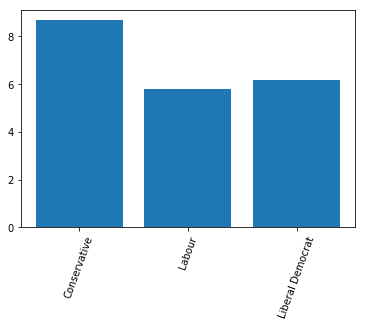

In [16]:
import matplotlib.pyplot as plt
# Make the x-axis tick text vertical so that it fits without having to stretch the picture
plt.xticks(rotation=70)
plt.bar(range(0, 3), height=eus_by_party['Europe'], tick_label=eus_by_party.index)
# Function savefig() must be called before show(); 
# the bbox_inches value 'tight' forces the function to fit exactly everything into the png
plt.savefig('eus_by_party_bar.png', format='png', bbox_inches='tight')
plt.show()

## 4)

In [18]:
# Contingency table
party_gender_tab = pd.crosstab(index=bedf['vote'], columns=bedf['gender'])
party_gender_tab

gender,female,male
vote,,
Conservative,259,203
Labour,372,348
Liberal Democrat,181,162


In [21]:
import scipy.stats as sps
# Chi-squared test
chisq, p, dof, evs = sps.chi2_contingency(party_gender_tab)
print("chi-squared " + str(chisq))
print("p = " + str(p))
print("degrees of freedom = " + str(dof))
print("expected value table: ")
print(evs)

chi-squared 2.222839501923292
p = 0.32909140141096305
degrees of freedom = 2
expected value table: 
[[245.99606557 216.00393443]
 [383.3704918  336.6295082 ]
 [182.63344262 160.36655738]]


The p-value is well within the chi-square distribution for the given degreens of freedom (2). Only in about 33% of cases will the chi-square for unrelated variables have a value that is lower than that. We can conclude that most probably there is no relationship between the two variables.

## 5)

In [42]:
bedf_redux = bedf[['vote', 'age']]
bedf_redux.head()

,vote,age
1,Liberal Democrat,43
2,Labour,36
3,Labour,35
4,Labour,24
5,Labour,41


In [50]:
f, p = sps.f_oneway(bedf_redux['age'][bedf_redux['vote']=='Conservative'], bedf_redux['age'][bedf_redux['vote']=='Labour'], bedf_redux['age'][bedf_redux['vote']=='Liberal Democrat'])
print("f-statistic: " + str(f) + "\np-value: " + str(p))

f-statistic: 9.811782179346423
p-value: 5.834903920540004e-05


Such a low p-value means a high significance of the f-statistic. In other words, there probably is a relationship.

## 6)

In [51]:
age_by_party = pd.pivot_table(bedf, values='age', index='vote', aggfunc=np.mean)
age_by_party

,age
vote,
Conservative,56.870130
Labour,53.004167
Liberal Democrat,53.034985


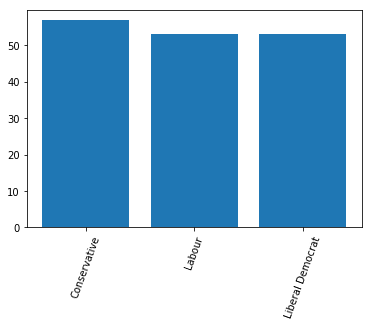

In [52]:
import matplotlib.pyplot as plt
# Make the x-axis tick text vertical so that it fits without having to stretch the picture
plt.xticks(rotation=70)
plt.bar(range(0, 3), height=age_by_party['age'], tick_label=age_by_party.index)
# Function savefig() must be called before show(); 
# the bbox_inches value 'tight' forces the function to fit exactly everything into the png
plt.savefig('age_by_party.png', format='png', bbox_inches='tight')
plt.show()

Even though to the naked eye the difference doesn't seem very big, the ANOVA test tells us that the difference between age means is statistically significant.